In [14]:
#from google.colab import drive
#drive.mount('/content/drive')

Images loaded successfully


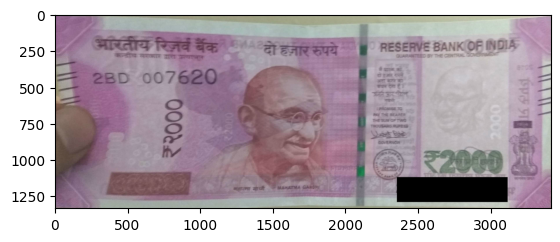

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

try:
    A = cv2.imread('Real.jpg')
    P = cv2.imread('fake.jpg')
    if A is None or P is None:
        raise Exception("Failed to read image file")
except Exception as e:
    print("Error:", e)
else:
    print("Images loaded successfully")
    # Convert BGR to RGB
    A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
    P = cv2.cvtColor(P, cv2.COLOR_BGR2RGB)
    plt.imshow(A)
    plt.show()


Coloured Image to black and white

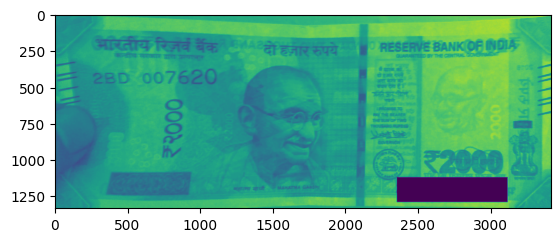

In [16]:
a = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
p = cv2.cvtColor(P, cv2.COLOR_BGR2GRAY)

plt.imshow(a)

Extracting gandhiji

Real

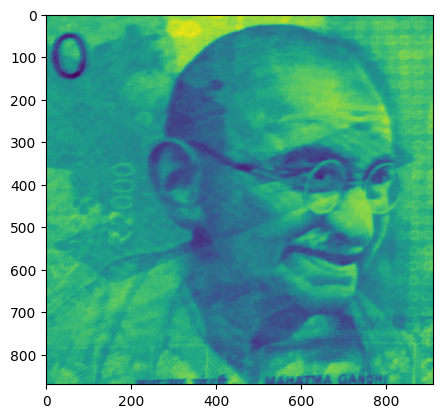

In [17]:
a2tr = a[330:1200, 1016:1927]

plt.imshow(a2tr)

Fake

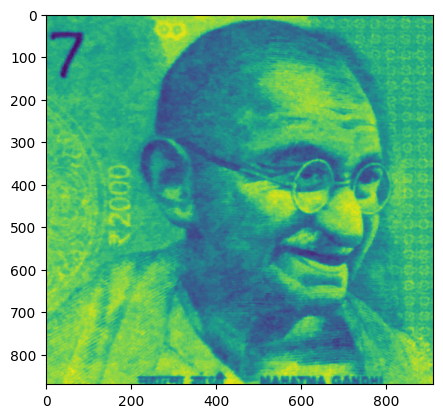

In [18]:
b2tr = p[170:1040, 716:1627]

plt.imshow(b2tr)

Strip

Real

(1332, 3416)


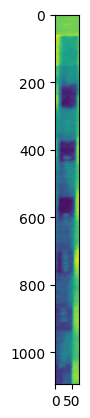

In [19]:
print(a.shape)
a2_str = a[5:1100, 2080:2151]

plt.imshow(a2_str)

Fake

(1100, 3000)


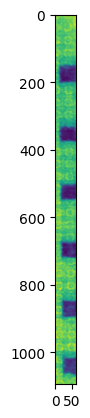

In [20]:
print(p.shape)
p2_str = p[5:1100, 1666:1729]

plt.imshow(p2_str)

Conversion to hue

In [21]:
hsvImageReal = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)

hsvImageFake = cv2.cvtColor(P, cv2.COLOR_BGR2HSV)

Result

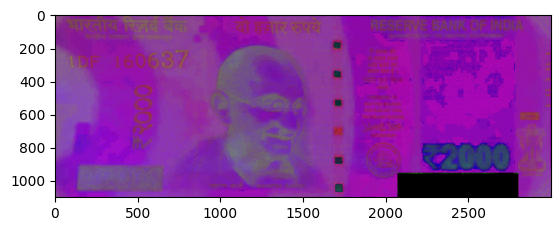

In [22]:
plt.imshow(hsvImageReal)
plt.imshow(hsvImageFake)

Thin strip extraction

Real

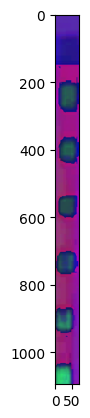

In [23]:
croppedImageReal = hsvImageReal[5:1100, 2080:2151]

plt.imshow(croppedImageReal)

Fake

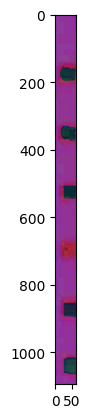

In [24]:
croppedImageFake = hsvImageFake[5:1100, 1666:1729]

plt.imshow(croppedImageFake)

Setting Threshold

In [25]:
satThresh = 0.3
valThresh = 0.9

g = croppedImageReal[:,:,1]>satThresh
h = croppedImageReal[:,:,2] < valThresh
 
g1 = croppedImageFake[:,:,1]>satThresh
h1 = croppedImageFake[:,:,2] < valThresh

BWImageReal = g&h
BWImageFake = g1&h1

Bwareaopen function (is a function that will find the connectivity in an image).

In [26]:
def bwareaopen(img, min_size, connectivity=8):
   
    # Find all connected components (called here "labels")
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        img, connectivity=connectivity)
    
    # check size of all connected components (area in pixels)
    for i in range(num_labels):
        label_size = stats[i, cv2.CC_STAT_AREA]
        
        # remove connected components smaller than min_size
        if label_size < min_size:
            img[labels == i] = 0
            
    return img

Morphological Extraction

Real

In [27]:
binr = cv2.threshold(a2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
 
# define the kernel
kernel = np.ones((3, 3), np.uint8)
 
# invert the image
invert = cv2.bitwise_not(binr)
 
# use morph gradient
BWImageCloseReal = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)

Fake

In [28]:
binr2 = cv2.threshold(p2_str, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
 
# define the kernel
kernel2 = np.ones((3, 3), np.uint8)
 
# invert the image
invert2 = cv2.bitwise_not(binr2)
 
# use morph gradient
BWImageCloseFake = cv2.morphologyEx(invert2, cv2.MORPH_GRADIENT, kernel2)

Bwareaopen

In [29]:
areaopenReal = bwareaopen(BWImageCloseReal, 15);

areaopenFake = bwareaopen(BWImageCloseFake, 15);

No. of lines

Real

In [30]:
bw = areaopenReal
 
labels = np.zeros(bw.shape)
countReal = cv2.connectedComponentsWithStats(bw, labels,8);

Fake

In [31]:
bw2 = areaopenFake
 
labels2 = np.zeros(bw2.shape)
countFake = cv2.connectedComponentsWithStats(bw2, labels2,8);

Correlation

In [32]:
def corr2(A, B):
    
    A_mA = A - A.mean(1)[:, None]
    B_mB = B - B.mean(1)[:, None]
 
    # Sum of squares across rows
    ssA = (A_mA**2).sum(1)
    ssB = (B_mB**2).sum(1)
 
    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA[:, None],ssB[None]))

In [33]:
co=corr2 (a2tr, b2tr)
 
if (co.any()>=0.5):
    print ('correlevance of transparent gandhi > 0.5')
    if (countReal[0] == countFake[0] ):
        print ('currency is legitimate')
    else:
        print ('green strip is fake')
else:
    print ('correlevance of transparent gandhi < 0.5')
    print ('currency is fake')

correlevance of transparent gandhi > 0.5
green strip is fake
